In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

dimensions de X: (100, 2)
dimensions de y: (100, 1)


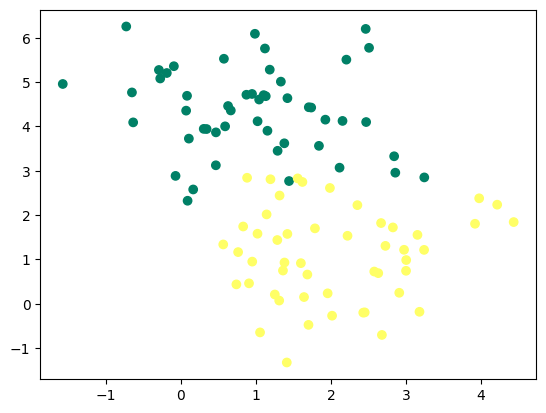

In [368]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=0)
y = np.reshape(y, (y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

In [369]:
def initialisation(X):
  params = {}
  # Generate a 2-dimensional array with shape (2, 1)
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  params["W"] = W
  params["b"] = b
  return params

In [370]:
params = initialisation(X)
params

{'W': array([[-0.8819245 ],
        [ 1.24319033]]),
 'b': array([0.6072343])}

In [371]:
# params["W"][0]
params["b"]

array([0.6072343])

In [372]:
print(X[:, 0].min()); print(X[:, 0].max())

-1.5767197372875836
4.4384122962968195


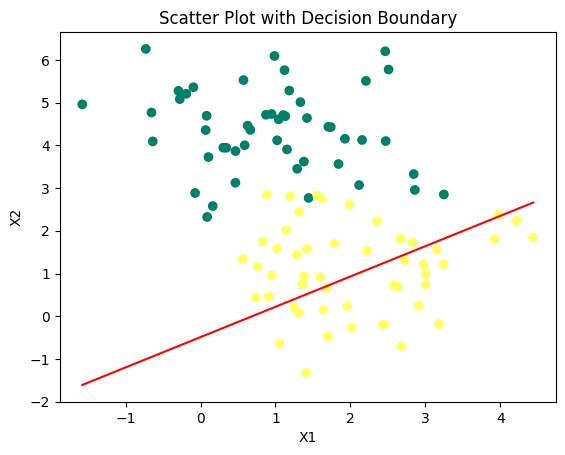

In [373]:
# initial model visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

# Calculate the corresponding values ​​for the y axis using the decision line equation
# W1 * x1 + W2 * x2 + b = 0 => y = -(W1 * x1 + b) / W2
y_values = -(params["W"][0] * x_values + params["b"]) / params["W"][1]

plt.plot(x_values, y_values, c='red')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Decision Boundary')
plt.show()

In [374]:
X.shape

(100, 2)

In [375]:
params["W"].shape

(2, 1)

In [376]:
params["b"].shape

(1,)

In [377]:
def model(X, params):
  Z = X.dot(params["W"]) + params["b"]
  return Z

In [378]:
Z = model(X, params)
Z.shape

(100, 1)

In [379]:
def activation(Z):
  return 1 / (1 + np.exp(-Z))

In [380]:
A = activation(Z)

In [381]:
A.shape

(100, 1)

In [382]:
def log_loss(y, A):
  return - 1 / len(y) * np.sum(y * np.log10(A) + (1 - y) * np.log10(1 - A))

In [383]:
err = log_loss(y, A)
err

1.3099304541094259

In [384]:
def gradients(X, y, A):
  grads = {}
  dW = 1/len(y) * np.dot(X.T, A - y)
  db = 1/len(y) * np.sum(A - y)

  grads["dW"] = dW
  grads["db"] = db

  return grads

In [385]:
grads = gradients(X, y, A)
grads

{'dW': array([[-0.10407116],
        [ 1.98996127]]),
 'db': 0.2516353366079561}

In [386]:
def update(params, grads, learning_rate = 0.01):
  params["W"] = params["W"] - learning_rate * grads["dW"]
  params["b"] = params["b"] - learning_rate * grads["db"]

  return params

In [387]:
def predict(X, params):
  A = activation(model(X, params))
  print(A)
  return A >= 0.5

In [401]:
def artificial_neuron(X, y, epochs, learning_rate = 0.01):
  errors = []
  params = initialisation(X)

  for i in range(epochs):
    Z = model(X, params)
    A = activation(Z)
    err = log_loss(y, A)
    errors.append(err)
    #print(f"Epoch {i + 1}...................... log_loss: {err}")
    grads = gradients(X, y, A)
    params = update(params, grads, learning_rate)

  return errors, params

In [407]:
epochs = 400
errors, params = artificial_neuron(X, y, epochs)

In [408]:
# final params
params

{'W': array([[ 0.79441524],
        [-0.73635448]]),
 'b': array([0.34469093])}

In [409]:
from sklearn.metrics import accuracy_score

In [410]:
# Model performance
print(accuracy_score(y, predict(X, params)))

[[0.88602615]
 [0.67420202]
 [0.02617042]
 [0.21491313]
 [0.88358591]
 [0.36639609]
 [0.1330019 ]
 [0.85243886]
 [0.10584015]
 [0.76601421]
 [0.08014539]
 [0.76842023]
 [0.06897423]
 [0.05689983]
 [0.62542276]
 [0.92512875]
 [0.95287398]
 [0.08961764]
 [0.64815545]
 [0.57632779]
 [0.09937151]
 [0.08804698]
 [0.39956026]
 [0.02563572]
 [0.86511571]
 [0.08067559]
 [0.79139179]
 [0.03371387]
 [0.12543388]
 [0.64029917]
 [0.91871504]
 [0.09807998]
 [0.59885035]
 [0.91952441]
 [0.40348186]
 [0.27290579]
 [0.68076495]
 [0.50014709]
 [0.44165907]
 [0.45219703]
 [0.13750036]
 [0.12862581]
 [0.00783874]
 [0.22706318]
 [0.25985676]
 [0.72735178]
 [0.89523365]
 [0.88571111]
 [0.02449026]
 [0.03663949]
 [0.84899895]
 [0.5231631 ]
 [0.0942669 ]
 [0.09228543]
 [0.69533862]
 [0.09586445]
 [0.60815745]
 [0.71943794]
 [0.85975733]
 [0.95224797]
 [0.57766801]
 [0.23457766]
 [0.02470027]
 [0.82498203]
 [0.04718752]
 [0.37753221]
 [0.08993783]
 [0.53851882]
 [0.84651279]
 [0.30668985]
 [0.23663177]
 [0.82

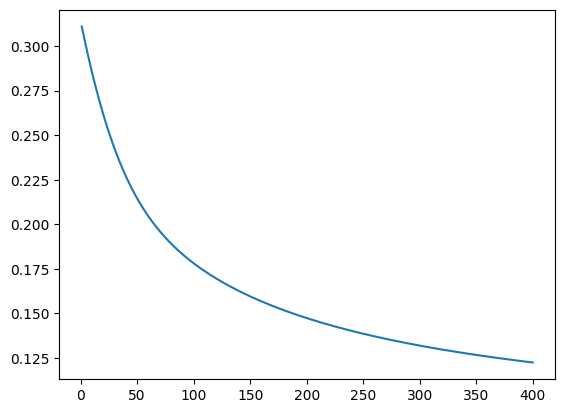

In [411]:
# Visualization of learning curve
plt.plot(np.arange(1, epochs+1), errors)
plt.show()

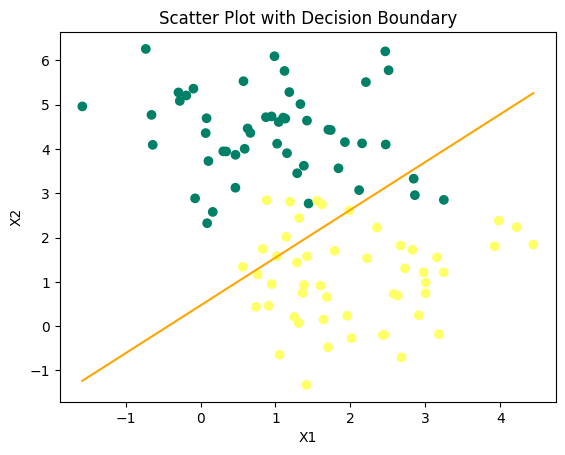

In [412]:
# final model visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(params["W"][0] * x_values + params["b"]) / params["W"][1]

plt.plot(x_values, y_values, c='orange')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Decision Boundary')
plt.show()

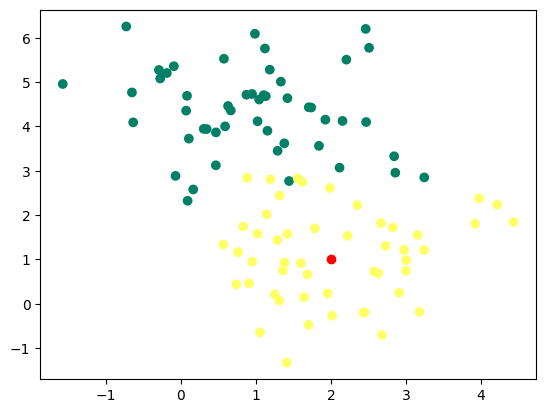

[0.76802041]


array([ True])

In [413]:
new_plant = np.array([2, 1])
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()
predict(new_plant, params)

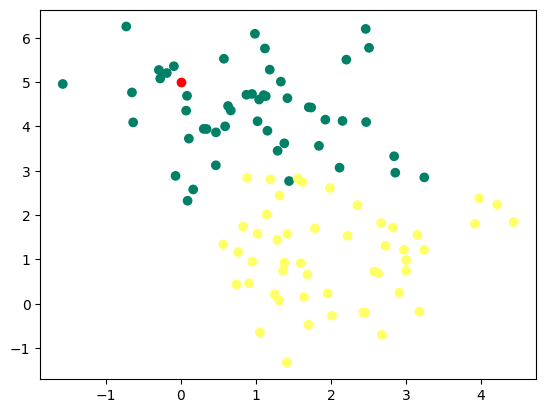

[0.03432076]


array([False])

In [414]:
new_plant = np.array([0, 5])
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()
predict(new_plant, params)

In [415]:
import plotly.graph_objects as go

In [416]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()